In [1]:
import this
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=np.inf)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
def sine_wave(num_samples, seq_length_min =30, seq_len_max = 70,
        freq_low=1, freq_high=5, amplitude_low =-0.1, amplitude_high=9.9):
    
    samples = []
    ix=[]
    seq_len = np.random.randint(seq_length_min, seq_len_max, num_samples) 
      # sequence length
    for i in range(num_samples):
        signals = []
        A = np.random.uniform(low=amplitude_high, high=amplitude_low)        # amplitude
        ix = np.arange(seq_len[i]+1)    
        signals.append(A*np.sin(2*np.pi*ix/float(seq_len[i])))
        samples.append(np.array(signals).T)     
#         print(ix[-1].size)        
    # the shape of the samples is num_samples x seq_length x num_signals
    samples = np.array(samples)
    return samples, seq_len,ix
n_samples = 500   # number of samples
samples, seq_len,ix = sine_wave(n_samples)

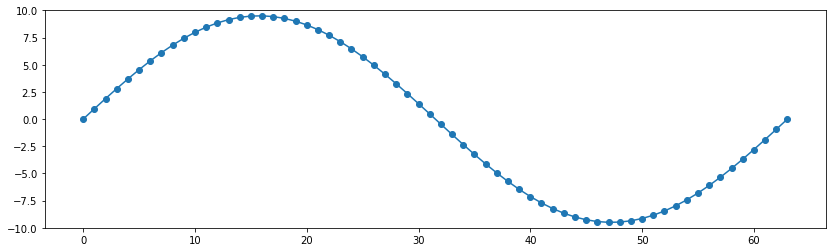

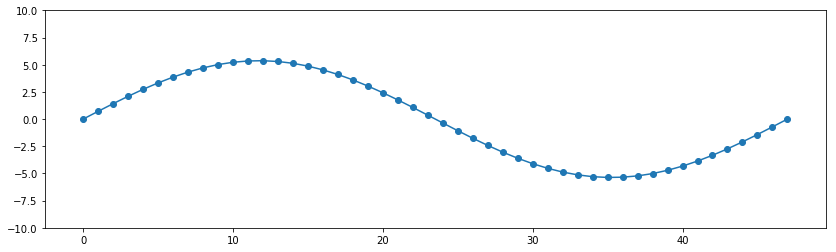

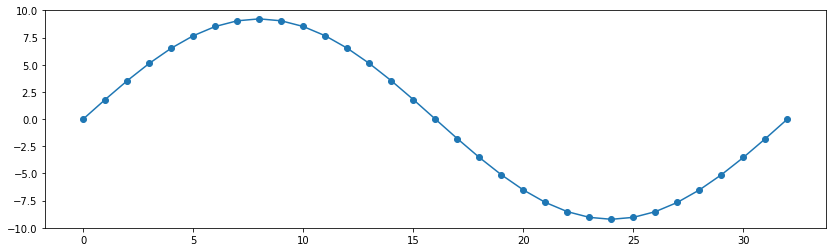

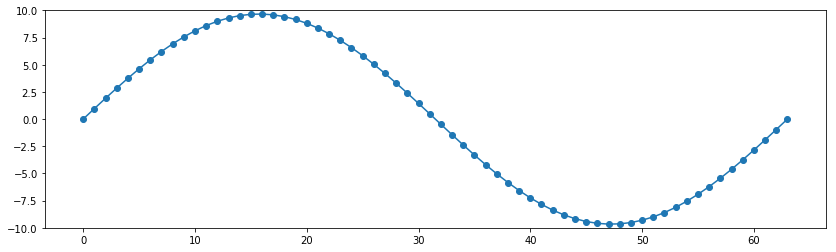

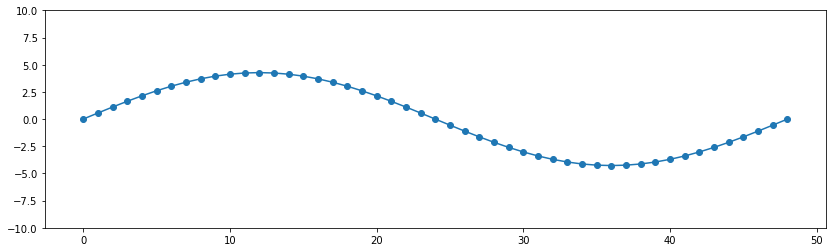

In [33]:
for i in range(5):
   ix = np.arange(seq_len[i*5]+1) 
   plt.figure(figsize = (14,4))
#     plt.subplot(5,4,i+1)
   plt.plot(samples[i*5])
   plt.scatter(ix,samples[i*5])
   plt.ylim(-10,10)
   plt.show

In [46]:
# Get random starting positions for the sine waves
seq_start = np.random.randint(0,100,n_samples)

# Pad with zeros before and after the sine waves
data = np.zeros((n_samples,200,1))

startP=[]
endP=[]
for j in range(n_samples):
    data[j] = np.concatenate((np.zeros((seq_start[j],1)),samples[j],np.zeros((200-seq_start[j]-seq_len[j]-1,1))))
    start_Position=seq_start[j]+2
    print('\nstarter_position:'+str(start_Position))
    end_Position=seq_start[j]+seq_len[j]+1
    print('\nend_position:'+str(end_Position)) 
    startP.append(start_Position)    
    endP.append(end_Position)


starter_position:99

end_position:161

starter_position:34

end_position:93

starter_position:59

end_position:120

starter_position:27

end_position:92

starter_position:91

end_position:146

starter_position:92

end_position:138

starter_position:73

end_position:139

starter_position:77

end_position:136

starter_position:88

end_position:152

starter_position:87

end_position:141

starter_position:72

end_position:103

starter_position:8

end_position:44

starter_position:3

end_position:71

starter_position:53

end_position:83

starter_position:64

end_position:108

starter_position:99

end_position:161

starter_position:6

end_position:59

starter_position:15

end_position:58

starter_position:49

end_position:106

starter_position:101

end_position:166

starter_position:49

end_position:96

starter_position:65

end_position:124

starter_position:10

end_position:41

starter_position:50

end_position:111

starter_position:65

end_position:111

starter_position:43

end_position:9

In [47]:
# print('\nsamples',samples)
print('\ndata_shape',data.shape)
data=data.reshape((data.shape[0],data.shape[1]))
print('\nnew_datashape',data.shape)   
startP=np.array(startP)
# print('\ntoalstartP',startP.shape)
endP=np.array(endP)
# print('\ntotalendP',endP.shape)
groundtruth=np.vstack((startP,endP)).T
print('\ngroundtruth',groundtruth.shape)


data_shape (500, 200, 1)
<built-in method reshape of numpy.ndarray object at 0x000002412D279170>

new_datashape (500, 200)

groundtruth (500, 2)


In [43]:
X_train, X_test, y_train, y_test =train_test_split(data, groundtruth, test_size = 0.1, random_state = 0)
# print('\nXtrain',X_train)
# print('\nYtrain',y_train)
# print('\nX_test',X_test)
print('\nY_test',y_test)


Y_test [[ 42  89]
 [ 10  63]
 [ 39  85]
 [ 30  79]
 [ 78 116]
 [ 40 102]
 [ 30  93]
 [ 78 133]
 [ 56  86]
 [ 12  69]
 [ 15  80]
 [ 91 159]
 [ 10  57]
 [ 90 153]
 [ 39  90]
 [ 56  90]
 [ 23  64]
 [ 57 122]
 [ 32  91]
 [ 21  89]
 [ 20  54]
 [ 11  76]
 [ 20  74]
 [ 63 113]
 [  7  42]
 [ 71 108]
 [ 47 106]
 [ 47  86]
 [ 17  75]
 [ 95 128]
 [ 20  69]
 [ 74 131]
 [ 67 110]
 [ 12  41]
 [ 73 137]
 [ 24  71]
 [ 53  93]
 [ 16  82]
 [ 79 133]
 [ 66 128]
 [ 70 116]
 [ 97 133]
 [101 152]
 [ 76 108]
 [ 33  81]
 [ 64 123]
 [ 59 123]
 [ 44  90]
 [ 33  84]
 [ 78 140]]


In [44]:
# Build the model.
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
model = Sequential([
        Dense(200, input_dim=X_train.shape[-1]), 
        Activation('relu'), 
        Dropout(0.2), 
        Dense(y_train.shape[-1])
    ])
model.compile('adadelta', 'mse')
model.fit(X_train, y_train, batch_size=64,nb_epoch=2000, verbose=2)

C:\Users\wang6897\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/2000
 - 0s - loss: 6878.4643
Epoch 2/2000
 - 0s - loss: 5791.8730
Epoch 3/2000
 - 0s - loss: 4594.7009
Epoch 4/2000
 - 0s - loss: 3575.4998
Epoch 5/2000
 - 0s - loss: 2805.0901
Epoch 6/2000
 - 0s - loss: 2408.9069
Epoch 7/2000
 - 0s - loss: 2191.4523
Epoch 8/2000
 - 0s - loss: 2103.0640
Epoch 9/2000
 - 0s - loss: 2033.4560
Epoch 10/2000
 - 0s - loss: 2012.1051
Epoch 11/2000
 - 0s - loss: 2011.7253
Epoch 12/2000
 - 0s - loss: 1968.9438
Epoch 13/2000
 - 0s - loss: 1941.1641
Epoch 14/2000
 - 0s - loss: 1897.4773
Epoch 15/2000
 - 0s - loss: 1887.8935
Epoch 16/2000
 - 0s - loss: 1848.4545
Epoch 17/2000
 - 0s - loss: 1824.6854
Epoch 18/2000
 - 0s - loss: 1824.2704
Epoch 19/2000
 - 0s - loss: 1807.9374
Epoch 20/2000
 - 0s - loss: 1784.0292
Epoch 21/2000
 - 0s - loss: 1802.7095
Epoch 22/2000
 - 0s - loss: 1802.2560
Epoch 23/2000
 - 0s - loss: 1743.1730
Epoch 24/2000
 - 0s - loss: 1754.2253
Epoch 25/2000
 - 0s - loss: 1699.5648
Epoch 26/2000
 - 0s - loss: 1746.0623
Epoch 27/2000
 - 0s -

Epoch 218/2000
 - 0s - loss: 239.8478
Epoch 219/2000
 - 0s - loss: 236.8423
Epoch 220/2000
 - 0s - loss: 213.3665
Epoch 221/2000
 - 0s - loss: 226.4718
Epoch 222/2000
 - 0s - loss: 222.5939
Epoch 223/2000
 - 0s - loss: 222.4414
Epoch 224/2000
 - 0s - loss: 223.9292
Epoch 225/2000
 - 0s - loss: 223.7306
Epoch 226/2000
 - 0s - loss: 215.3439
Epoch 227/2000
 - 0s - loss: 227.7500
Epoch 228/2000
 - 0s - loss: 220.3216
Epoch 229/2000
 - 0s - loss: 211.2004
Epoch 230/2000
 - 0s - loss: 198.4814
Epoch 231/2000
 - 0s - loss: 194.9402
Epoch 232/2000
 - 0s - loss: 203.5968
Epoch 233/2000
 - 0s - loss: 212.7963
Epoch 234/2000
 - 0s - loss: 190.6483
Epoch 235/2000
 - 0s - loss: 181.4309
Epoch 236/2000
 - 0s - loss: 215.7946
Epoch 237/2000
 - 0s - loss: 224.4978
Epoch 238/2000
 - 0s - loss: 202.3299
Epoch 239/2000
 - 0s - loss: 203.2728
Epoch 240/2000
 - 0s - loss: 201.2759
Epoch 241/2000
 - 0s - loss: 188.8646
Epoch 242/2000
 - 0s - loss: 190.4345
Epoch 243/2000
 - 0s - loss: 223.3328
Epoch 244/20

Epoch 434/2000
 - 0s - loss: 109.3665
Epoch 435/2000
 - 0s - loss: 116.0370
Epoch 436/2000
 - 0s - loss: 123.8560
Epoch 437/2000
 - 0s - loss: 108.2248
Epoch 438/2000
 - 0s - loss: 100.2249
Epoch 439/2000
 - 0s - loss: 107.8790
Epoch 440/2000
 - 0s - loss: 126.2215
Epoch 441/2000
 - 0s - loss: 116.4692
Epoch 442/2000
 - 0s - loss: 97.7706
Epoch 443/2000
 - 0s - loss: 104.9429
Epoch 444/2000
 - 0s - loss: 102.3292
Epoch 445/2000
 - 0s - loss: 108.0469
Epoch 446/2000
 - 0s - loss: 105.8275
Epoch 447/2000
 - 0s - loss: 112.8065
Epoch 448/2000
 - 0s - loss: 118.3319
Epoch 449/2000
 - 0s - loss: 102.9808
Epoch 450/2000
 - 0s - loss: 112.3767
Epoch 451/2000
 - 0s - loss: 117.4528
Epoch 452/2000
 - 0s - loss: 113.2605
Epoch 453/2000
 - 0s - loss: 116.4883
Epoch 454/2000
 - 0s - loss: 96.3390
Epoch 455/2000
 - 0s - loss: 106.2765
Epoch 456/2000
 - 0s - loss: 106.4865
Epoch 457/2000
 - 0s - loss: 101.2867
Epoch 458/2000
 - 0s - loss: 107.2937
Epoch 459/2000
 - 0s - loss: 102.9424
Epoch 460/2000

Epoch 653/2000
 - 0s - loss: 88.6807
Epoch 654/2000
 - 0s - loss: 115.1049
Epoch 655/2000
 - 0s - loss: 83.6882
Epoch 656/2000
 - 0s - loss: 90.5438
Epoch 657/2000
 - 0s - loss: 81.4068
Epoch 658/2000
 - 0s - loss: 89.3305
Epoch 659/2000
 - 0s - loss: 89.5285
Epoch 660/2000
 - 0s - loss: 98.6666
Epoch 661/2000
 - 0s - loss: 89.5706
Epoch 662/2000
 - 0s - loss: 80.2365
Epoch 663/2000
 - 0s - loss: 87.7811
Epoch 664/2000
 - 0s - loss: 104.4023
Epoch 665/2000
 - 0s - loss: 92.8312
Epoch 666/2000
 - 0s - loss: 97.5940
Epoch 667/2000
 - 0s - loss: 85.0277
Epoch 668/2000
 - 0s - loss: 91.2697
Epoch 669/2000
 - 0s - loss: 81.6164
Epoch 670/2000
 - 0s - loss: 83.7863
Epoch 671/2000
 - 0s - loss: 87.8847
Epoch 672/2000
 - 0s - loss: 94.5191
Epoch 673/2000
 - 0s - loss: 90.4226
Epoch 674/2000
 - 0s - loss: 78.4704
Epoch 675/2000
 - 0s - loss: 83.9411
Epoch 676/2000
 - 0s - loss: 84.3115
Epoch 677/2000
 - 0s - loss: 96.0640
Epoch 678/2000
 - 0s - loss: 86.6923
Epoch 679/2000
 - 0s - loss: 83.5537

Epoch 875/2000
 - 0s - loss: 83.5575
Epoch 876/2000
 - 0s - loss: 77.1128
Epoch 877/2000
 - 0s - loss: 78.8103
Epoch 878/2000
 - 0s - loss: 71.1411
Epoch 879/2000
 - 0s - loss: 76.8698
Epoch 880/2000
 - 0s - loss: 74.9023
Epoch 881/2000
 - 0s - loss: 78.3604
Epoch 882/2000
 - 0s - loss: 76.9904
Epoch 883/2000
 - 0s - loss: 74.7068
Epoch 884/2000
 - 0s - loss: 73.7908
Epoch 885/2000
 - 0s - loss: 76.2025
Epoch 886/2000
 - 0s - loss: 83.2078
Epoch 887/2000
 - 0s - loss: 82.8767
Epoch 888/2000
 - 0s - loss: 71.7074
Epoch 889/2000
 - 0s - loss: 75.4614
Epoch 890/2000
 - 0s - loss: 78.7216
Epoch 891/2000
 - 0s - loss: 79.6912
Epoch 892/2000
 - 0s - loss: 75.9508
Epoch 893/2000
 - 0s - loss: 75.2662
Epoch 894/2000
 - 0s - loss: 76.0707
Epoch 895/2000
 - 0s - loss: 78.6640
Epoch 896/2000
 - 0s - loss: 82.1075
Epoch 897/2000
 - 0s - loss: 83.2044
Epoch 898/2000
 - 0s - loss: 87.2960
Epoch 899/2000
 - 0s - loss: 80.7068
Epoch 900/2000
 - 0s - loss: 89.7022
Epoch 901/2000
 - 0s - loss: 72.9148
E

Epoch 1094/2000
 - 0s - loss: 70.9681
Epoch 1095/2000
 - 0s - loss: 86.4805
Epoch 1096/2000
 - 0s - loss: 70.9971
Epoch 1097/2000
 - 0s - loss: 71.6925
Epoch 1098/2000
 - 0s - loss: 73.4858
Epoch 1099/2000
 - 0s - loss: 74.1660
Epoch 1100/2000
 - 0s - loss: 67.3810
Epoch 1101/2000
 - 0s - loss: 78.4205
Epoch 1102/2000
 - 0s - loss: 78.4599
Epoch 1103/2000
 - 0s - loss: 67.8053
Epoch 1104/2000
 - 0s - loss: 60.7022
Epoch 1105/2000
 - 0s - loss: 79.5073
Epoch 1106/2000
 - 0s - loss: 65.5275
Epoch 1107/2000
 - 0s - loss: 70.2816
Epoch 1108/2000
 - 0s - loss: 78.6454
Epoch 1109/2000
 - 0s - loss: 73.0527
Epoch 1110/2000
 - 0s - loss: 83.1013
Epoch 1111/2000
 - 0s - loss: 71.6838
Epoch 1112/2000
 - 0s - loss: 76.0672
Epoch 1113/2000
 - 0s - loss: 74.0406
Epoch 1114/2000
 - 0s - loss: 70.4550
Epoch 1115/2000
 - 0s - loss: 76.8236
Epoch 1116/2000
 - 0s - loss: 81.3356
Epoch 1117/2000
 - 0s - loss: 66.1159
Epoch 1118/2000
 - 0s - loss: 73.7572
Epoch 1119/2000
 - 0s - loss: 69.9533
Epoch 1120/2

Epoch 1310/2000
 - 0s - loss: 73.4379
Epoch 1311/2000
 - 0s - loss: 65.2529
Epoch 1312/2000
 - 0s - loss: 80.1969
Epoch 1313/2000
 - 0s - loss: 73.0990
Epoch 1314/2000
 - 0s - loss: 63.1187
Epoch 1315/2000
 - 0s - loss: 64.2524
Epoch 1316/2000
 - 0s - loss: 60.6493
Epoch 1317/2000
 - 0s - loss: 63.0892
Epoch 1318/2000
 - 0s - loss: 63.7910
Epoch 1319/2000
 - 0s - loss: 64.3381
Epoch 1320/2000
 - 0s - loss: 61.3314
Epoch 1321/2000
 - 0s - loss: 59.0554
Epoch 1322/2000
 - 0s - loss: 65.1289
Epoch 1323/2000
 - 0s - loss: 64.8670
Epoch 1324/2000
 - 0s - loss: 73.6004
Epoch 1325/2000
 - 0s - loss: 62.2703
Epoch 1326/2000
 - 0s - loss: 60.8907
Epoch 1327/2000
 - 0s - loss: 69.0167
Epoch 1328/2000
 - 0s - loss: 58.8025
Epoch 1329/2000
 - 0s - loss: 75.7166
Epoch 1330/2000
 - 0s - loss: 70.0984
Epoch 1331/2000
 - 0s - loss: 72.3794
Epoch 1332/2000
 - 0s - loss: 69.9369
Epoch 1333/2000
 - 0s - loss: 64.6319
Epoch 1334/2000
 - 0s - loss: 75.3371
Epoch 1335/2000
 - 0s - loss: 66.0768
Epoch 1336/2

Epoch 1526/2000
 - 0s - loss: 54.7991
Epoch 1527/2000
 - 0s - loss: 58.8232
Epoch 1528/2000
 - 0s - loss: 63.1463
Epoch 1529/2000
 - 0s - loss: 57.9551
Epoch 1530/2000
 - 0s - loss: 69.5090
Epoch 1531/2000
 - 0s - loss: 59.4242
Epoch 1532/2000
 - 0s - loss: 65.3388
Epoch 1533/2000
 - 0s - loss: 66.4853
Epoch 1534/2000
 - 0s - loss: 60.3758
Epoch 1535/2000
 - 0s - loss: 64.8901
Epoch 1536/2000
 - 0s - loss: 59.9929
Epoch 1537/2000
 - 0s - loss: 58.4802
Epoch 1538/2000
 - 0s - loss: 61.8921
Epoch 1539/2000
 - 0s - loss: 63.9261
Epoch 1540/2000
 - 0s - loss: 62.8557
Epoch 1541/2000
 - 0s - loss: 59.5419
Epoch 1542/2000
 - 0s - loss: 75.8380
Epoch 1543/2000
 - 0s - loss: 95.0814
Epoch 1544/2000
 - 0s - loss: 59.0389
Epoch 1545/2000
 - 0s - loss: 59.3299
Epoch 1546/2000
 - 0s - loss: 62.0625
Epoch 1547/2000
 - 0s - loss: 59.3033
Epoch 1548/2000
 - 0s - loss: 59.0249
Epoch 1549/2000
 - 0s - loss: 59.2626
Epoch 1550/2000
 - 0s - loss: 57.6460
Epoch 1551/2000
 - 0s - loss: 55.8583
Epoch 1552/2

Epoch 1742/2000
 - 0s - loss: 63.9896
Epoch 1743/2000
 - 0s - loss: 61.7810
Epoch 1744/2000
 - 0s - loss: 59.3823
Epoch 1745/2000
 - 0s - loss: 53.7062
Epoch 1746/2000
 - 0s - loss: 56.6878
Epoch 1747/2000
 - 0s - loss: 56.1433
Epoch 1748/2000
 - 0s - loss: 58.1369
Epoch 1749/2000
 - 0s - loss: 62.7579
Epoch 1750/2000
 - 0s - loss: 61.0351
Epoch 1751/2000
 - 0s - loss: 55.5553
Epoch 1752/2000
 - 0s - loss: 60.4793
Epoch 1753/2000
 - 0s - loss: 54.8718
Epoch 1754/2000
 - 0s - loss: 51.0155
Epoch 1755/2000
 - 0s - loss: 66.1649
Epoch 1756/2000
 - 0s - loss: 56.9988
Epoch 1757/2000
 - 0s - loss: 58.9472
Epoch 1758/2000
 - 0s - loss: 53.7211
Epoch 1759/2000
 - 0s - loss: 56.8892
Epoch 1760/2000
 - 0s - loss: 70.4889
Epoch 1761/2000
 - 0s - loss: 76.9900
Epoch 1762/2000
 - 0s - loss: 64.2711
Epoch 1763/2000
 - 0s - loss: 56.1989
Epoch 1764/2000
 - 0s - loss: 53.9794
Epoch 1765/2000
 - 0s - loss: 56.3888
Epoch 1766/2000
 - 0s - loss: 46.4993
Epoch 1767/2000
 - 0s - loss: 64.2057
Epoch 1768/2

Epoch 1958/2000
 - 0s - loss: 47.9324
Epoch 1959/2000
 - 0s - loss: 49.1401
Epoch 1960/2000
 - 0s - loss: 51.8533
Epoch 1961/2000
 - 0s - loss: 53.7794
Epoch 1962/2000
 - 0s - loss: 49.0993
Epoch 1963/2000
 - 0s - loss: 56.3085
Epoch 1964/2000
 - 0s - loss: 74.6194
Epoch 1965/2000
 - 0s - loss: 56.8121
Epoch 1966/2000
 - 0s - loss: 47.2821
Epoch 1967/2000
 - 0s - loss: 58.0973
Epoch 1968/2000
 - 0s - loss: 57.8420
Epoch 1969/2000
 - 0s - loss: 51.9571
Epoch 1970/2000
 - 0s - loss: 46.5782
Epoch 1971/2000
 - 0s - loss: 56.6123
Epoch 1972/2000
 - 0s - loss: 54.3665
Epoch 1973/2000
 - 0s - loss: 54.6160
Epoch 1974/2000
 - 0s - loss: 46.3035
Epoch 1975/2000
 - 0s - loss: 48.5118
Epoch 1976/2000
 - 0s - loss: 54.7975
Epoch 1977/2000
 - 0s - loss: 57.7651
Epoch 1978/2000
 - 0s - loss: 53.9808
Epoch 1979/2000
 - 0s - loss: 52.4236
Epoch 1980/2000
 - 0s - loss: 52.3979
Epoch 1981/2000
 - 0s - loss: 53.0773
Epoch 1982/2000
 - 0s - loss: 59.3901
Epoch 1983/2000
 - 0s - loss: 53.4039
Epoch 1984/2

In [45]:
#result
score=model.evaluate(X_test,y_test,verbose=1)
print('\nscore',score)


prediction=model.predict(X_test,verbose=0,steps=1)
print(prediction)

50/50 [==============================] - 0s 2ms/step

score 28.803338165283204
[[ 40.153072  84.29443 ]
 [  9.993797  63.933918]
 [ 37.854618  85.4234  ]
 [ 28.465757  74.981636]
 [ 79.45236  124.95252 ]
 [ 39.556667 105.86163 ]
 [ 29.444286  86.91845 ]
 [ 79.71033  134.4165  ]
 [ 49.147396  89.66629 ]
 [ 11.040013  73.69572 ]
 [ 14.902807  72.74816 ]
 [ 97.326485 162.34267 ]
 [  9.18543   57.45152 ]
 [ 90.34075  154.93843 ]
 [ 40.361214  91.14793 ]
 [ 51.52118   92.47061 ]
 [ 35.533054  79.46357 ]
 [ 61.93555  131.5423  ]
 [ 31.229036  86.17954 ]
 [ 20.992573  86.95042 ]
 [ 19.98324   58.412556]
 [ 12.280421  61.47128 ]
 [ 22.72561   74.059425]
 [ 70.54044  126.81497 ]
 [  5.619336  40.186764]
 [ 70.35151  113.6109  ]
 [ 48.38659  112.69481 ]
 [ 44.174126  88.75669 ]
 [ 16.806     76.28371 ]
 [ 96.93821  128.48627 ]
 [ 19.96264   65.95373 ]
 [ 76.33997  134.53773 ]
 [ 75.2226   122.34151 ]
 [  9.293548  42.78316 ]
 [ 76.443016 134.09915 ]
 [ 37.82087   82.15444 ]
 [ 51.20673   93.2529